# Датасет с Титаником

## Примечание:
На компьютере никогда не запускался XGBoost

Но я работал с catboost, так что принцип тот же

Для произвольного набора данных решить задачу:
1. Классификации
  - случ. лес;
  - логистическая регрессия
  - градиентный бустинг (использовать пакет XGBoost)
  
2. Регрессии
   - случ. лес;
   - линейн. регрессия;
   - градиент. бустинг

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

import os
%config IPCompleter.greedy = True
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
plt.figure(figsize=(9,9))
plt.rcParams["figure.figsize"] = [9, 9]

<Figure size 648x648 with 0 Axes>

## Предобработка данных

Для классификации мы будем вычислять параметр ***Survived***.

Для регрессии мы будем предсказывать возраст ***Age***

In [5]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
result=[]
i=0
for i in range(len(train)):
    result.append(len(train.loc[i, 'Name'].split(',')[0]))
train['Surname_Length'] = result

In [7]:
result=[]
i=0
for i in range(len(train)):
    result.append(len(train.loc[i, 'Name']))
train['Fullname_Length'] = result

In [8]:
result=[]
i=0
for i in range(len(train)):
    result.append(len(train.loc[i, 'Name'].split(',')[1]))
train['Name_Length'] = result

In [9]:
result=[]
i=0
for i in range(len(train)):
    result.append(train.loc[i, 'Name'].split(',')[1].split('.')[0].strip())
train['Title'] = result
train.loc[1, 'Name'].split(',')[1].split('.')[0].strip()

'Mrs'

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname_Length,Fullname_Length,Name_Length,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,6,23,16,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,51,43,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9,22,12,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,8,44,35,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,24,18,Mr


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Surname_Length   891 non-null    int64  
 13  Fullname_Length  891 non-null    int64  
 14  Name_Length      891 non-null    int64  
 15  Title            891 non-null    object 
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


In [12]:
train.groupby(['Title', 'Survived']).count()['Age']

Title         Survived
Capt          0             1
Col           0             1
              1             1
Don           0             1
Dr            0             3
              1             3
Jonkheer      0             1
Lady          1             1
Major         0             1
              1             1
Master        0            15
              1            21
Miss          0            41
              1           105
Mlle          1             2
Mme           1             1
Mr            0           331
              1            67
Mrs           0            23
              1            85
Ms            1             1
Rev           0             6
Sir           1             1
the Countess  1             1
Name: Age, dtype: int64

In [15]:
train.corr().Survived.sort_values(ascending=False)

Survived           1.000000
Name_Length        0.336069
Fullname_Length    0.332350
Fare               0.257307
Parch              0.081629
Surname_Length     0.032149
PassengerId       -0.005007
SibSp             -0.035322
Age               -0.077221
Pclass            -0.338481
Name: Survived, dtype: float64

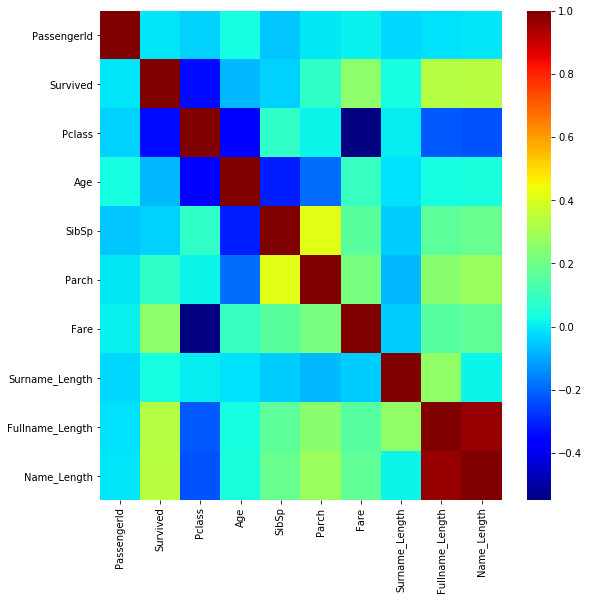

In [16]:
sns.heatmap(train.corr(), cmap='jet')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname_Length,Fullname_Length,Name_Length,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,6,23,16,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7,51,43,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9,22,12,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,8,44,35,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,24,18,Mr


C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


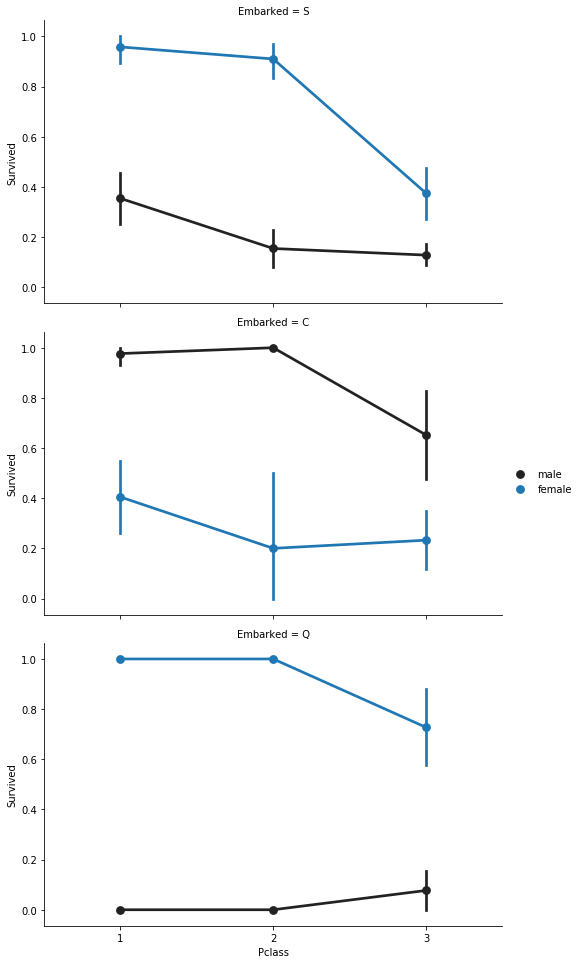

In [18]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

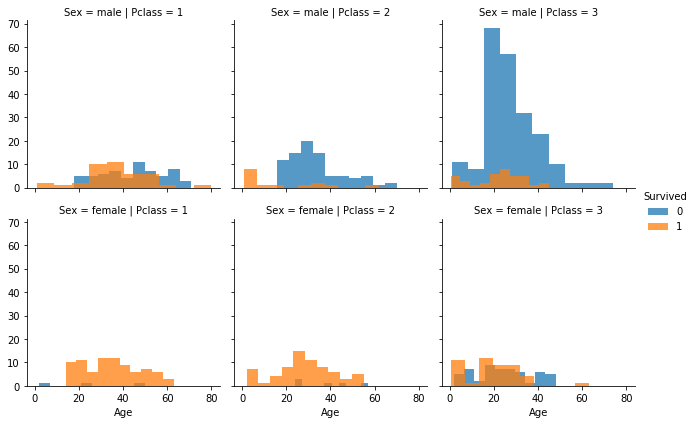

In [19]:
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

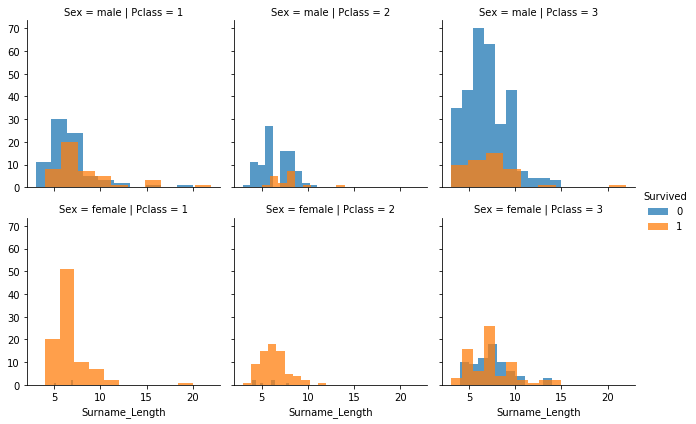

In [20]:
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Surname_Length', alpha = .75)
h.add_legend()

In [21]:
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [22]:
train.drop(['Fullname_Length', 'Surname_Length', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
train =pd.get_dummies(train)

train_regr - датасет для регрессии

In [33]:
train_regr = train[train.Age.fillna('Unknown') != 'Unknown']
train_regr.shape

(714, 27)

In [208]:
print('*' * 248)

********************************************************************************************************************************************************************************************************************************************************


In [68]:
train.Age.fillna(train.Age.median(), inplace=True)

X = train.drop('Survived', axis=1)
y = train['Survived']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=13)

In [70]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rev', 'Title_Sir', 'Title_the Countess'],
      dtype='object')

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 711 to 338
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         712 non-null    int64  
 1   Pclass              712 non-null    int64  
 2   Age                 712 non-null    float64
 3   SibSp               712 non-null    int64  
 4   Parch               712 non-null    int64  
 5   Fare                712 non-null    float64
 6   Name_Length         712 non-null    int64  
 7   Sex_female          712 non-null    uint8  
 8   Sex_male            712 non-null    uint8  
 9   Embarked_C          712 non-null    uint8  
 10  Embarked_Q          712 non-null    uint8  
 11  Embarked_S          712 non-null    uint8  
 12  Title_Capt          712 non-null    uint8  
 13  Title_Col           712 non-null    uint8  
 14  Title_Don           712 non-null    uint8  
 15  Title_Dr            712 non-null    uint8  
 16  Title_

In [72]:
print(X_train.shape)
X_train.columns

(712, 26)


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rev', 'Title_Sir', 'Title_the Countess'],
      dtype='object')

## Классификация

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(random_state=42, max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.8188811188811188

In [88]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

In [95]:
print('accuracy_score: ', accuracy_score(y_valid, rfc.predict(X_valid))),
print('recall_score: ', recall_score(y_valid, rfc.predict(X_valid))),
print('precision_score: ', precision_score(y_valid, rfc.predict(X_valid))),
print('roc_auc_score: ', roc_auc_score(y_valid, rfc.predict(X_valid)))

accuracy_score:  0.8324022346368715
recall_score:  0.782608695652174
precision_score:  0.782608695652174
roc_auc_score:  0.8231225296442688


In [76]:
sorted(zip(rfc.feature_importances_, X_train.columns), reverse=True)

[(0.19141502606831282, 'Sex_male'),
 (0.1531934562111214, 'Sex_female'),
 (0.14964029351739186, 'Title_Mr'),
 (0.08555658557690173, 'Fare'),
 (0.07793018046469279, 'Pclass'),
 (0.06367240211403562, 'Name_Length'),
 (0.054200377332342085, 'Title_Miss'),
 (0.04429978552878142, 'SibSp'),
 (0.04215349172628793, 'Age'),
 (0.034977491257907285, 'Title_Mrs'),
 (0.03149062364832218, 'PassengerId'),
 (0.016417419037946177, 'Embarked_S'),
 (0.016005890011202315, 'Title_Master'),
 (0.014371788324833221, 'Parch'),
 (0.010182810419483925, 'Embarked_C'),
 (0.007765164164054114, 'Embarked_Q'),
 (0.003849777886798651, 'Title_Rev'),
 (0.0009422374794334281, 'Title_Dr'),
 (0.0006714704947761936, 'Title_Don'),
 (0.0005760528717548077, 'Title_Major'),
 (0.00027168254803478864, 'Title_Jonkheer'),
 (0.00023555096461950572, 'Title_Sir'),
 (9.88793509955776e-05, 'Title_Col'),
 (6.851044240950613e-05, 'Title_Lady'),
 (1.305255756064253e-05, 'Title_the Countess'),
 (0.0, 'Title_Capt')]

In [77]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [85]:
cbc = CatBoostClassifier(     depth=4,
                             iterations=2100,
                             learning_rate=0.2,
                             #l2_leaf_reg = 50,
                             border_count = 254,
                             bagging_temperature = 1,
                             eval_metric='Accuracy',
                             loss_function = 'Logloss',
                             random_seed = 13,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=200)

In [86]:
cbc.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             use_best_model=True,
             #cat_features=cate_features_index,
             verbose=True)

0:	learn: 0.7991573	test: 0.8379888	best: 0.8379888 (0)	total: 2.4ms	remaining: 5.04s
75:	learn: 0.9227528	test: 0.8379888	best: 0.8547486 (9)	total: 139ms	remaining: 3.7s
150:	learn: 0.9705056	test: 0.8212291	best: 0.8547486 (9)	total: 299ms	remaining: 3.85s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8547486034
bestIteration = 9

Shrink model to first 10 iterations.


In [96]:
print('accuracy_score: ', accuracy_score(y_valid, cbc.predict(X_valid))),
print('recall_score: ', recall_score(y_valid, cbc.predict(X_valid))),
print('precision_score: ', precision_score(y_valid, cbc.predict(X_valid))),
print('roc_auc_score: ', roc_auc_score(y_valid, cbc.predict(X_valid)))

accuracy_score:  0.8547486033519553
recall_score:  0.8115942028985508
precision_score:  0.8115942028985508
roc_auc_score:  0.8467061923583663


In [87]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [98]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
print('accuracy_score: ', accuracy_score(y_valid, log_reg.predict(X_valid))),
print('recall_score: ', recall_score(y_valid, log_reg.predict(X_valid))),
print('precision_score: ', precision_score(y_valid, log_reg.predict(X_valid))),
print('roc_auc_score: ', roc_auc_score(y_valid, log_reg.predict(X_valid)))

accuracy_score:  0.8547486033519553
recall_score:  0.7971014492753623
precision_score:  0.8208955223880597
roc_auc_score:  0.8440052700922266


# Регрессия

In [100]:
X = train_regr.drop('Age', axis=1)
y = train_regr['Age']

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rfr = RandomForestRegressor(random_state=42, max_depth=4)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
print('mean_absolute_error: ', mean_absolute_error(y_valid, rfr.predict(X_valid))),
print('mean_squared_error: ', mean_squared_error(y_valid, rfr.predict(X_valid))),
print('r2_score: ', r2_score(y_valid, rfr.predict(X_valid)))

mean_absolute_error:  0.23588610601243953
mean_squared_error:  0.11742649036858496
r2_score:  0.5042869330830262


In [112]:
cbr = CatBoostRegressor(     depth=4,
                             iterations=2100,
                             learning_rate=0.1,
                             #l2_leaf_reg = 50,
                             border_count = 254,
                             bagging_temperature = 1,
                             eval_metric='MAE',
                             loss_function = 'MAE',
                             random_seed = 13,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=200)

In [113]:
cbr.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             use_best_model=True,
             #cat_features=cate_features_index,
             verbose=True)

0:	learn: 0.3641852	test: 0.3636869	best: 0.3636869 (0)	total: 1.92ms	remaining: 4.04s
75:	learn: 0.1796520	test: 0.1721450	best: 0.1708888 (53)	total: 99.1ms	remaining: 2.64s
150:	learn: 0.1684776	test: 0.1686973	best: 0.1682260 (142)	total: 182ms	remaining: 2.35s
225:	learn: 0.1616394	test: 0.1715426	best: 0.1680659 (161)	total: 282ms	remaining: 2.33s
300:	learn: 0.1575514	test: 0.1721581	best: 0.1680659 (161)	total: 360ms	remaining: 2.15s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.1680658562
bestIteration = 161

Shrink model to first 162 iterations.


In [114]:
print('mean_absolute_error: ', mean_absolute_error(y_valid, cbr.predict(X_valid))),
print('mean_squared_error: ', mean_squared_error(y_valid, cbr.predict(X_valid))),
print('r2_score: ', r2_score(y_valid, cbr.predict(X_valid)))

mean_absolute_error:  0.16806679631410043
mean_squared_error:  0.1338035484053002
r2_score:  0.4351515817583368


In [115]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
print('mean_absolute_error: ', mean_absolute_error(y_valid, lin_reg.predict(X_valid))),
print('mean_squared_error: ', mean_squared_error(y_valid, lin_reg.predict(X_valid))),
print('r2_score: ', r2_score(y_valid, lin_reg.predict(X_valid)))

mean_absolute_error:  0.2620852667175499
mean_squared_error:  0.12548419033272215
r2_score:  0.47027154908422264
